## PS4
```
Fiona Fan
MACS 30100
2018.2.3
```

In [165]:
import pandas as pd
import numpy as np
import sklearn as sk
%matplotlib inline
from pandas.plotting import scatter_matrix
from pandas import DataFrame
import seaborn as sns
import statsmodels.api as sm
from sklearn import neighbors

## 1a)

In [166]:
df = pd.read_csv("Auto.csv",na_values = "?")


## 1b)

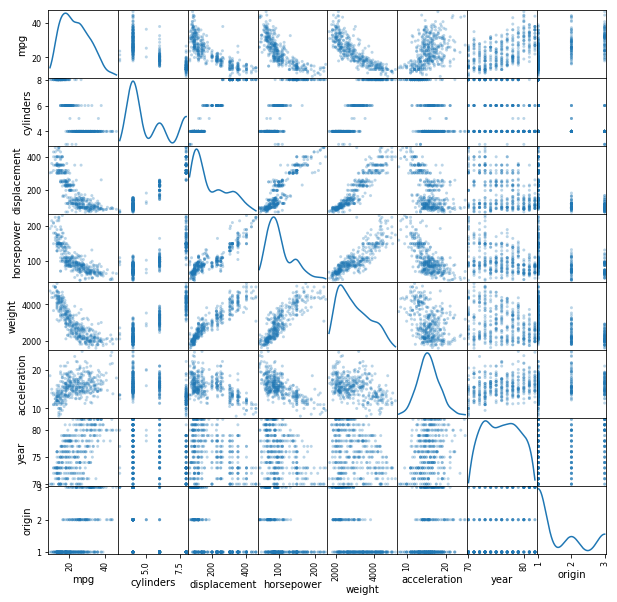

In [167]:
scatter_matrix(df, alpha=0.3, figsize=(10, 10),
               diagonal='kde')
print()

## 1c)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


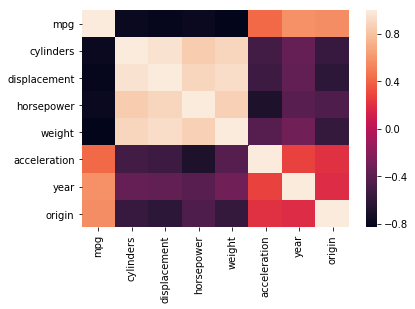

In [168]:
sns.heatmap(df.corr())
df.corr()

## 1d)

In [169]:
df['const'] = 1
reg1 = sm.OLS(endog=df.mpg, exog=df[['const','cylinders','displacement','horsepower',
                                     'weight','acceleration','year','origin']], missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        14:01:10   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

 * The coefficients for displacement, weight, year and origin are sigificant at the 1% level.
 * The coefficients for cylinders, horsepower, and acceleration are not significant at 10% level.
 * As year goes up by one, mpg goes up by 0.75. 

## 1e)
 * The three variables that seem to have non-linear relationships with mpg are displacement, horsepower and weight.
 

In [170]:
df ['displacement_sqd'] = df.displacement **2
df ['horsepower_sqd'] = df.horsepower**2
df ['weight_sqd'] = df.weight **2
df ['acceleration_sqd'] = df.acceleration **2
reg2 = sm.OLS(endog=df.mpg, exog=df[['const','cylinders','displacement','horsepower','weight','acceleration',
                                     'year','origin','displacement_sqd','horsepower_sqd','weight_sqd','acceleration_sqd']], missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        14:01:15   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.1084      6.696  

 * My new $R^2$ is 0.866, which is better than reg1 0.818.
 * Displacement just became insignificant, both the squared term and the original one. 
 * Cylinder is still insignificant, but a little more insignificant. Its coefficient flipped sign from negative to positive. 
 
## 1f)

In [171]:
[a] = results2.predict([1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])
# print(results2.params[:,1])
print(f'The predicted results is {a:0.2f}')

The predicted results is 38.73


## 2a)

In [172]:
df2 = pd.DataFrame(data = {'x1' : [0, 2, 0 , 0, -1, 1],
              'x2' : [3, 0, 1, 1, 0, 1], 
              'x3' : [0, 0, 3, 2, 1, 1], 
              'y' : ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
df2

,x1,x2,x3,y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


In [173]:
x1,x2,x3 = np.array([0,0,0])
df2['dis'] = ((df2.x1-x1)**2+(df2.x2-x2)**2+(df2.x3-x3)**2)**0.5

## 2b) c)

In [174]:
y = df2.y
x = np.column_stack((df2['x1'], df2['x2'], df2['x3']))
knn_1 = sk.neighbors.KNeighborsClassifier(n_neighbors=1)
results3 = knn_1.fit(x, y)
print(results3.predict([(0,0,0)]))
print(knn_1.kneighbors([(0,0,0)]))


['Green']
(array([[ 1.41421356]]), array([[4]]))


In [175]:
knn_3 = sk.neighbors.KNeighborsClassifier(n_neighbors=3)
results4 = knn_3.fit(x, y)
print(results4.predict([(0,0,0)]))
print(knn_3.kneighbors([(0,0,0)]))

['Red']
(array([[ 1.41421356,  1.73205081,  2.        ]]), array([[4, 5, 1]]))


When K=1, only the closet neightbor (with the least euclidean distance) is factored into consideration. Thus, (-1,0,1), whose category is "Green" is used to predict the value of (0,0,0).

When K=3, three closest neighbors (-1,0,1), (1,1,1), (2,0,0) predict two Reds and one Green. Thus the final result should be "Red".

## 2 d)
I would expect K to be small. Overly large K tend to lead to overly simplified decision boundaries. When K is small, the new point's neighbors would have more bearings on the prediction of the new point, and thus capture more of the non-linearity compared to when K is large. 

## 2 e)

In [176]:
knn_2 = sk.neighbors.KNeighborsClassifier(n_neighbors=2)
results5 = knn_2.fit(x, y)
print(results5.predict([(1,1,1)]))
print(knn_2.kneighbors([(1,1,1)]))

['Green']
(array([[ 0.        ,  1.41421356]]), array([[5, 3]]))


## 3 a)

In [161]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,displacement_sqd,horsepower_sqd,weight_sqd,acceleration_sqd,mpg_cat
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,94249.0,16900.0,12278016,144.00,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,122500.0,27225.0,13638249,132.25,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,101124.0,22500.0,11806096,121.00,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,92416.0,22500.0,11785489,144.00,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,91204.0,19600.0,11895601,110.25,0


In [177]:
from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression

df['mpg_cat'] = pd.qcut(df.mpg,2,labels=False)
df_new = df[['const','cylinders','displacement','horsepower',
                                     'weight','acceleration','year','origin','mpg_cat']].dropna()
X = df_new.iloc[:,:-1]
# X = sm.add_constant(X)
y = df_new.iloc[:,-1]
# print (X)
# print (y.dtypes)
logit_full = sm.Logit(y,X)
results_logit = logit_full.fit()
print (results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.189320
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                mpg_cat   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7265
Time:                        14:01:33   Log-Likelihood:                -74.213
converged:                       True   LL-Null:                       -271.30
                                        LLR p-value:                 4.235e-81
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -22.7150      6.140     -3.700      0.000     -34.749     -10.681
cylinders       -0.0633

The variables with (p>0.05) regressors are weight and year. 

## 3 b) c)

In [178]:
Xtrain, Xtest, ytrain, ytest = cv.train_test_split(X,y,test_size=0.5,random_state=10 )
# print (Xtrain)
logit_train = sk.linear_model.LogisticRegression(fit_intercept = False, C = 1e9)
results_logit_1 = logit_train.fit(Xtrain,ytrain)
results_logit_1.coef_[0]
# print (f'$$/beta_0$$ is {coef }')

array([-0.05307509, -0.38163049,  0.00578935, -0.04990603, -0.00498274,
       -0.25405321,  0.31057987, -0.00410371])

$\beta_0$ is -0.052, $\beta_1$ is -0.372, $\beta_2$ is -0.0057, $\beta_3$ is -0.0484, $\beta_4$ is -0.005, $\beta_5$ is -0.239, $\beta_6$ is -.307,  $\beta_7$ is -0.0037

## 3 d)

In [179]:
from sklearn.metrics import confusion_matrix, classification_report
ypred = results_logit_1.predict(Xtest)
confusion_matrix = confusion_matrix(ytest, ypred)
confusion_matrix

array([[89, 16],
       [10, 81]])

In [180]:
print(classification_report(ytest, ypred))


             precision    recall  f1-score   support

          0       0.90      0.85      0.87       105
          1       0.84      0.89      0.86        91

avg / total       0.87      0.87      0.87       196



The performance of the model predicting mpg_cat =0 and mpg_cat =1 is similar. It has slightly higher average for predicting mpg_cat=0.